# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [112]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


In [113]:
# data import
wholesale_data = pd.read_csv("Wholesale_Data.csv")

In [114]:
# quick look at the data
wholesale_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [115]:
# data cleaning

# checking for null values
print("\nMissing values:\n", wholesale_data.isnull().sum()) # no null values

# stats for each column
print("\nDataset Summary:\n", wholesale_data.describe())


Missing values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Dataset Summary:
           Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.0000

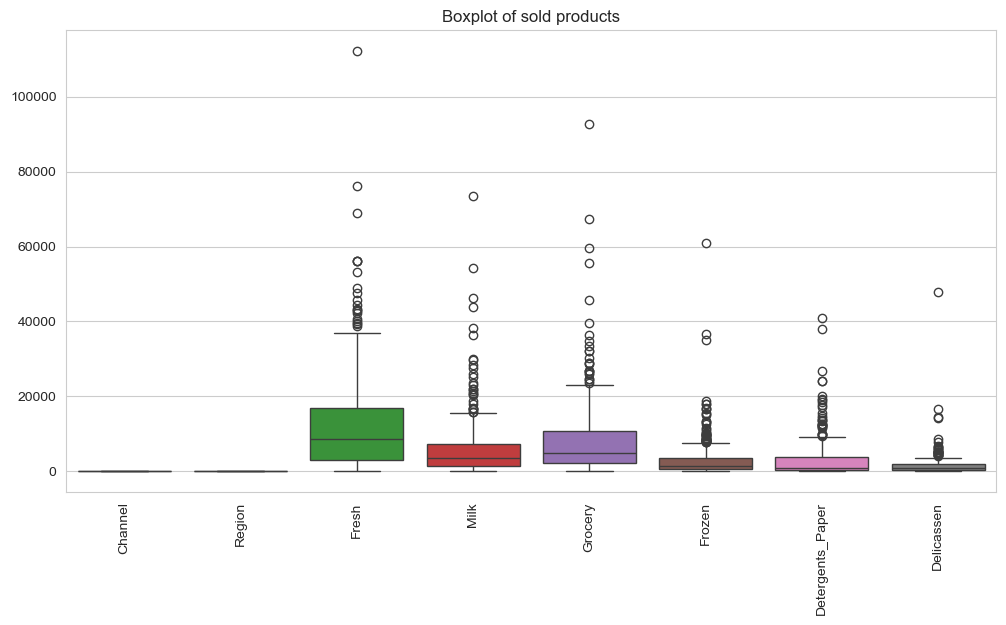

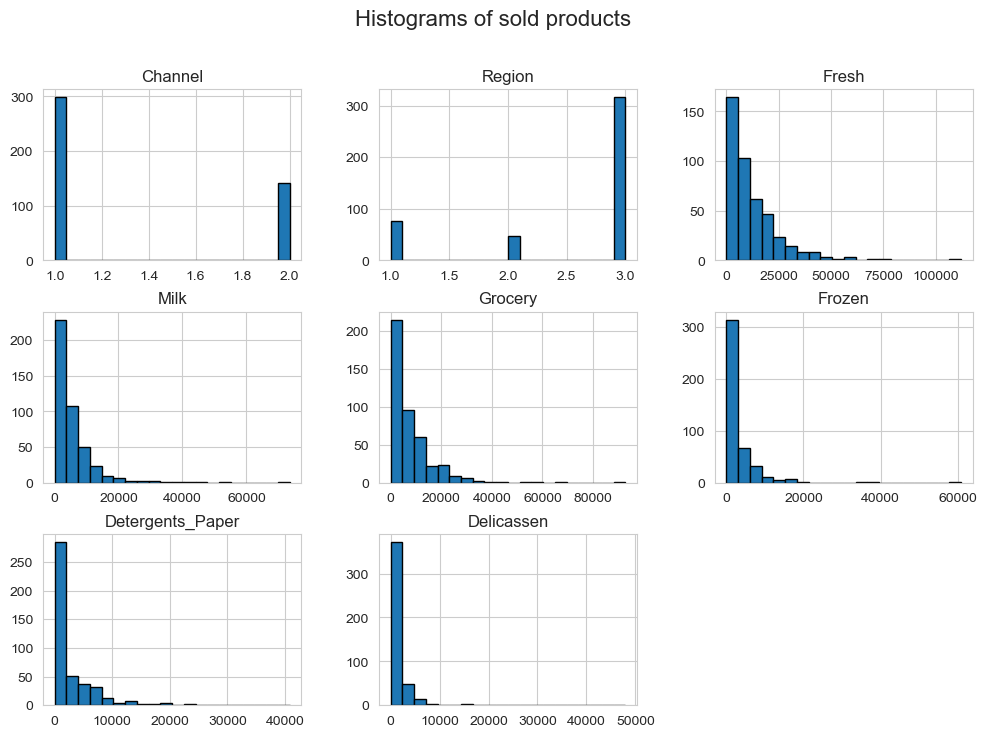

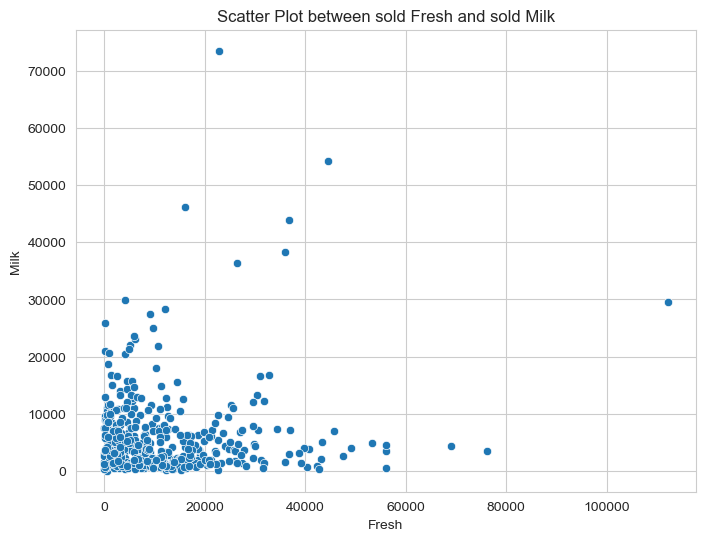

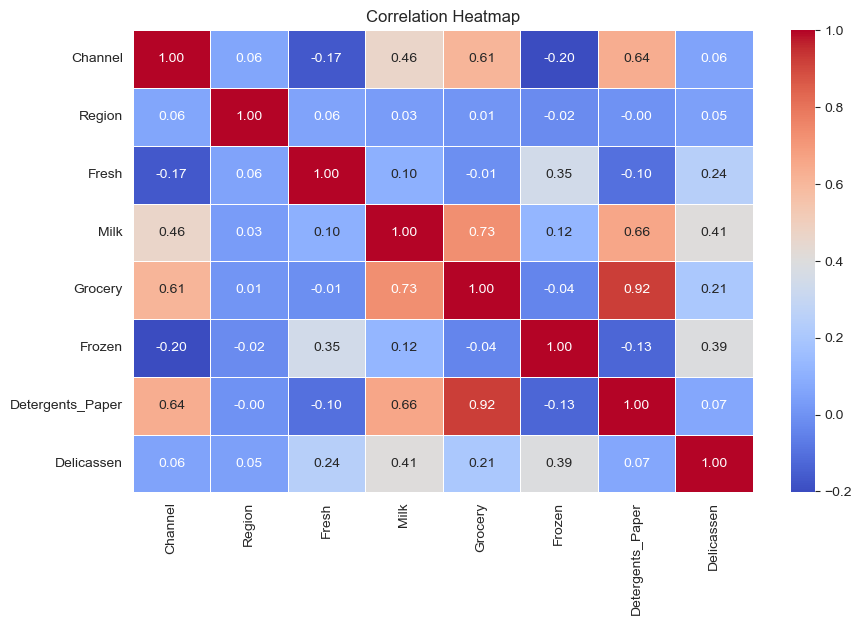

In [116]:
# data visualization

# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=wholesale_data)
plt.xticks(rotation=90)
plt.title("Boxplot of sold products")
plt.show()

# Histogram
wholesale_data.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of sold products", fontsize=16)
plt.show()

# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=wholesale_data["Fresh"], y=wholesale_data["Milk"])
plt.xlabel("Fresh")
plt.ylabel("Milk")
plt.title("Scatter Plot between sold Fresh and sold Milk")
plt.show()

# Heatmap
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(wholesale_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [117]:
# -- Histograms -- 
# there are few extreme values - high spending customers
# data is not normally distribited - some features have large values which can 
# affect the clustering results.

# -- Box plots -- 
# some features have significant outliers - some customers purchase more than others

# -- Scatter plot --
# weak correlation between milk and fresh products
# custoemrs who buy fresh products do not necessary buy milk

# -- Heatmap --
# positive correlation: milk and grocery

In [118]:
# dropping Region and Channel columsn
wholesale_data_numerical = wholesale_data.drop(columns=['Channel', 'Region'])

# removing outliers - IQR
Q1 = wholesale_data_numerical.quantile(0.25)
Q3 = wholesale_data_numerical.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

wholesale_data_numerical_cleaned = wholesale_data_numerical[~((wholesale_data_numerical < lower_bound) | (wholesale_data_numerical > upper_bound)).any(axis=1)]

print(f"Original dataset size: {wholesale_data_numerical.shape[0]} rows")
print(f"Dataset size after outlier removal: {wholesale_data_numerical_cleaned.shape[0]} rows")


# standardizing the data
scaler = StandardScaler()
wholesale_scaled = scaler.fit_transform(wholesale_data_numerical_cleaned)

wholesale_data_scaled = pd.DataFrame(wholesale_scaled, columns=wholesale_data_numerical_cleaned.columns)

wholesale_data_scaled.head()


Original dataset size: 440 rows
Dataset size after outlier removal: 332 rows


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465
1,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591
2,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169
3,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749
4,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

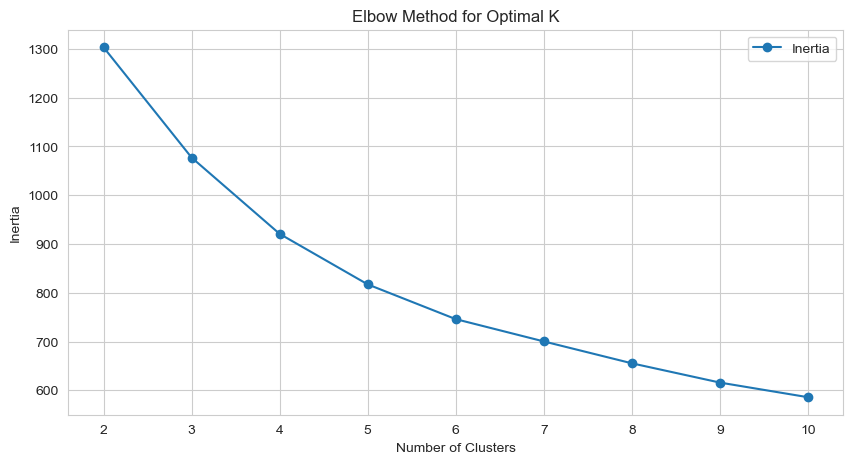

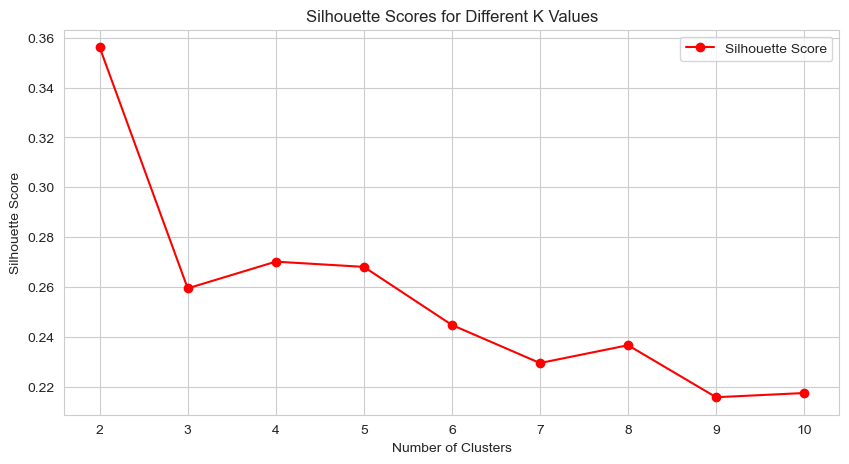

In [119]:
# determining the optimal K value

k_range = range(2, 11)

inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(wholesale_data_scaled)  # fitting KMeans model on scaled data
    inertia.append(kmeans.inertia_)  # storing sum of squared distances
    silhouette_scores.append(silhouette_score(wholesale_data_scaled, kmeans.labels_))  # computing silhouette score

# plotting the Elbow method
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.show()

# plotting Silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='red', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K Values')
plt.legend()
plt.show()

In [120]:
# interpretation
# the elbow method shows K=4 as the optimal k value. 
# the silhoutte score shows 2 as the best k value for clustering since its closer to 1.
# to achieve the meaningful seperation, I choose k=4

In [121]:
# applying K means clustering

optimal_k = 4
wholesale_data_scaled_k_means = wholesale_data_scaled
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
wholesale_data_scaled_k_means['Cluster'] = kmeans.fit_predict(wholesale_data_scaled_k_means)  # Assign clusters

# Print cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Count data points in each cluster
print("\nCluster Distribution:\n", wholesale_data_scaled_k_means['Cluster'].value_counts())

Cluster Centers:
 [[ 1.02671609  0.50661474  0.35892993 -0.325672    0.02845582  1.5017297 ]
 [-0.29450541 -0.47100681 -0.50433813 -0.50622488 -0.48162588 -0.48768353]
 [ 0.46919331 -0.55095003 -0.58014849  1.39044993 -0.58282576 -0.15208013]
 [-0.5641464   1.27641501  1.47005232 -0.32706181  1.63228527  0.23969469]]

Cluster Distribution:
 Cluster
1    142
2     78
3     69
0     43
Name: count, dtype: int64


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

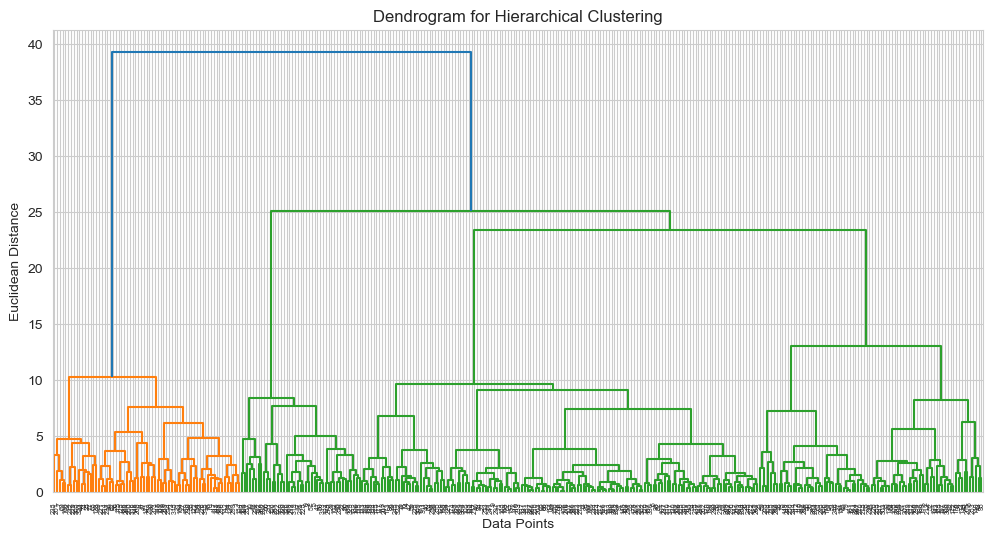

In [122]:
#wholesale_data_scaled = wholesale_data_scaled.drop(columns=['Cluster'])

linkage_matrix = linkage(wholesale_data_scaled, method='ward')

# plotting dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [123]:
# the major split is around 20
# if we cross a horizontal line here, we get 2 clusters (1 orange and 1 greens)
# to have a finer segmentation, cutting the tree around 15-20. we have 3 clusters

In [124]:
# assigning cluster labels
number_of_clusters = 3

# Applying Agglomerative Clustering
wholesale_data_scaled_hc = wholesale_data_scaled
hc = AgglomerativeClustering(n_clusters=number_of_clusters, metric='euclidean', linkage='ward')
wholesale_data_scaled_hc['HC_Cluster'] = hc.fit_predict(wholesale_data_scaled_hc)

# Count the number of points in each cluster
print(wholesale_data_scaled_hc['HC_Cluster'].value_counts())


HC_Cluster
0    222
1     67
2     43
Name: count, dtype: int64


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [125]:
wholesale_data_scaled = wholesale_data_scaled.drop(columns=['HC_Cluster'])

# applying PCA
pca = PCA()
wholesale_data_scaled_pca = pca.fit_transform(wholesale_data_scaled)

# Checking variance of each component
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("\nExplained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.42682014 0.62161678 0.7929952  0.89426681 0.94484887 0.98168141
 1.        ]


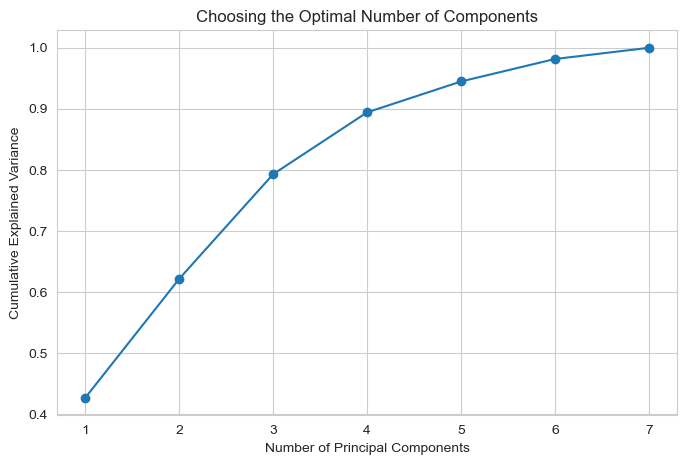

In [126]:
# we see that PCA1 + PCA2 + PCA3 + PCA4 = 80% variance which is a bit lower than 85%
# PCA1 + PCA2 + PCA3 + PCA4 + PCA5 = 92% which is a good balance (>85% and <95%)

# using elbow method to decide
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing the Optimal Number of Components')
plt.show()


In [127]:
# we see that the change is very little after point 4. 
pca = PCA(n_components=4)
wholesale_data_scaled_pca_4 = pca.fit_transform(wholesale_data_scaled)

# converting to DataFrame for easier use
wholesale_data_scaled_pca_4 = pd.DataFrame(wholesale_data_scaled_pca_4, columns=[f'PC{i+1}' for i in range(4)])

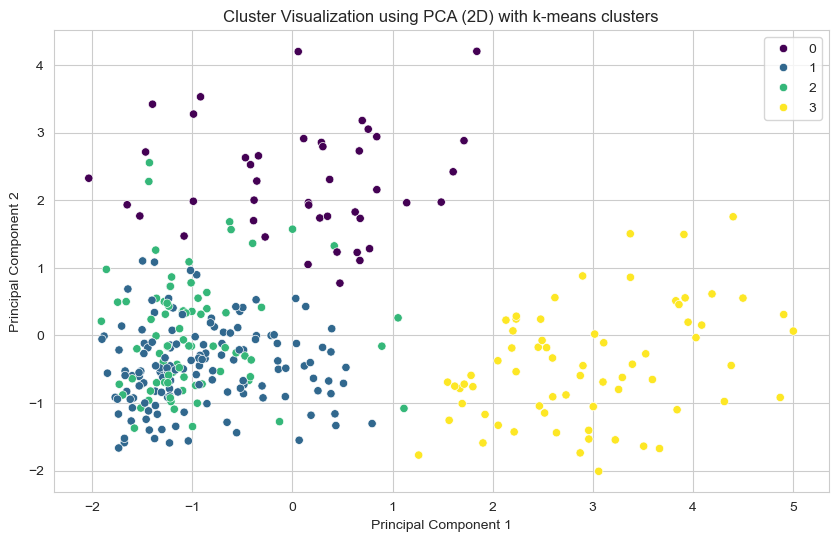

In [128]:
# -- PCA and K-means Cluster --

# visualizing pca performance
wholesale_data_scaled_pca_4["Cluster"] = wholesale_data_scaled_k_means["Cluster"]

# Scatter plot of first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wholesale_data_scaled_pca_4["PC1"], y=wholesale_data_scaled_pca_4["PC2"], hue=wholesale_data_scaled_pca_4["Cluster"], palette="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Visualization using PCA (2D) with k-means clusters")
plt.legend()
plt.show()


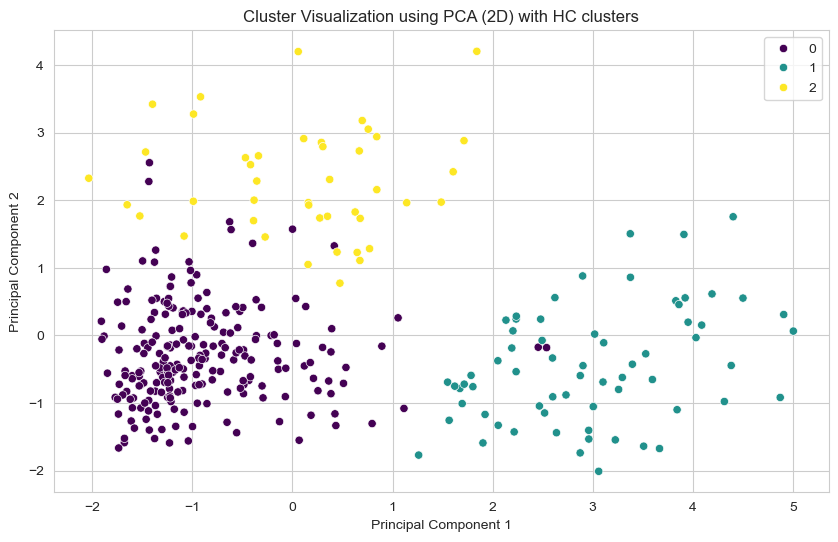

In [129]:
# -- PCA and HC cluster --

wholesale_data_scaled_pca_4["Cluster"] = wholesale_data_scaled_hc["HC_Cluster"]
# Scatter plot of first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wholesale_data_scaled_pca_4["PC1"], y=wholesale_data_scaled_pca_4["PC2"], hue=wholesale_data_scaled_pca_4["Cluster"], palette="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Visualization using PCA (2D) with HC clusters")
plt.legend()
plt.show()


In [130]:
# using pca and k-means, we see that there is an overlap between cluster 1 and 2
# using pca and hc, we see that the clusters are more disctinct without any overlaps
# hierarchical clustering provides more distinct groups, making it easier to interpret.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [131]:
# computing average customer spendidng

data = wholesale_data_numerical_cleaned.copy()


data["k_means_cluster"] = wholesale_data_scaled_k_means["Cluster"]
data["hc_cluster"] = wholesale_data_scaled_hc["HC_Cluster"]

# computing average spending for each cluster (K-Means)
kmeans_spending = data.groupby("k_means_cluster").mean(numeric_only=True)

# computing average spending for each cluster (HC)
hc_spending = data.groupby("hc_cluster").mean(numeric_only=True)

#kmeans_spending.head()
#hc_spending.head()

<Figure size 1200x600 with 0 Axes>

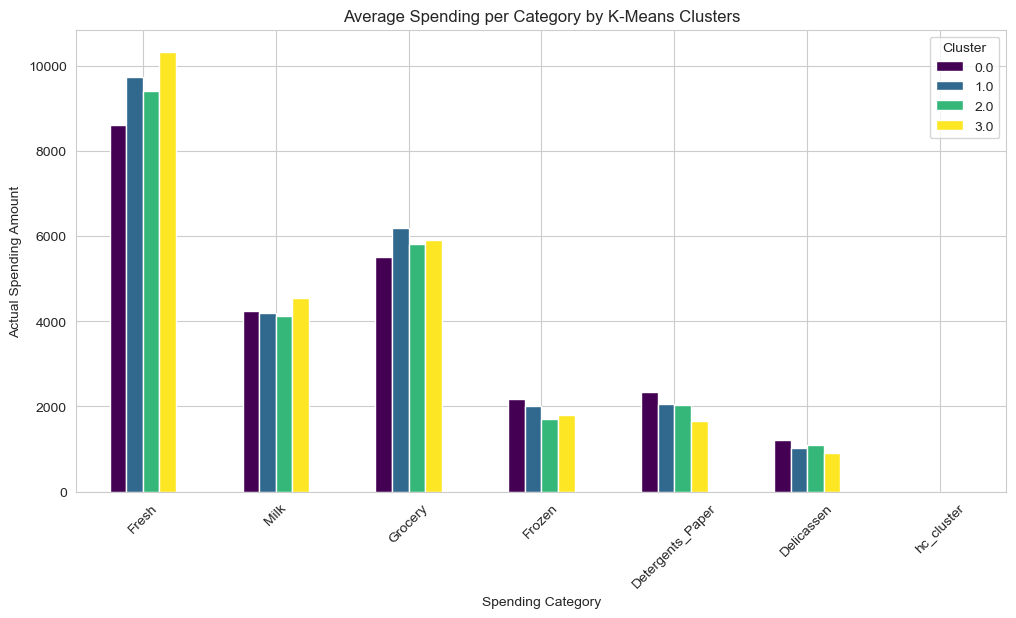

In [132]:
# Visualization

# -- spending behavior for K-Means clusters --
plt.figure(figsize=(12, 6))
kmeans_spending.T.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Average Spending per Category by K-Means Clusters")
plt.xlabel("Spending Category")
plt.ylabel("Actual Spending Amount")
plt.legend(title="Cluster")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

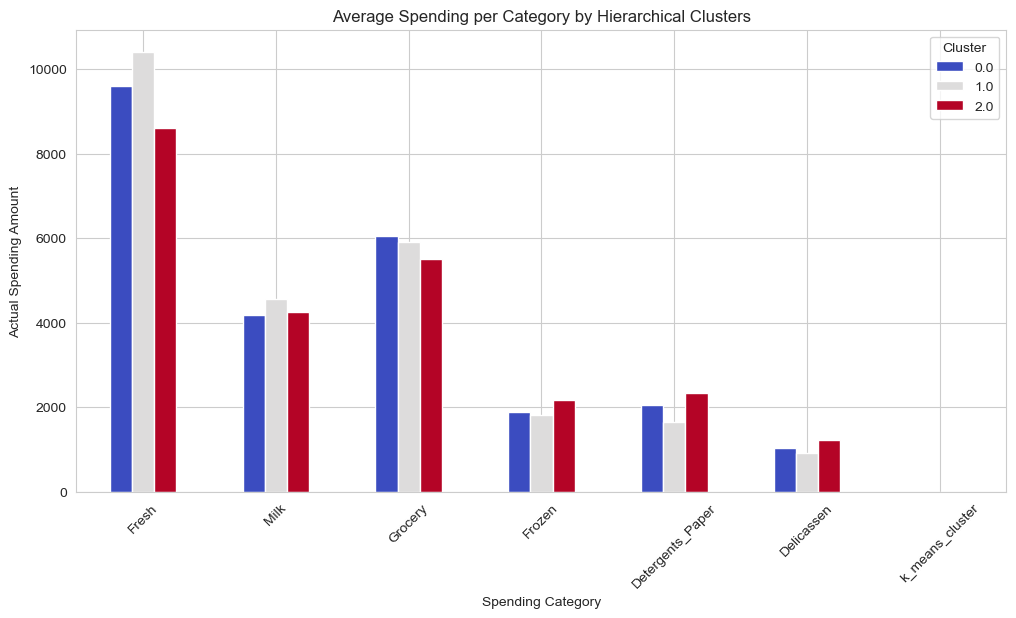

In [133]:
# -- spending behavior for Hierarchical Clustering clusters --
plt.figure(figsize=(12, 6))
hc_spending.T.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title("Average Spending per Category by Hierarchical Clusters")
plt.xlabel("Spending Category")
plt.ylabel("Actual Spending Amount")
plt.legend(title="Cluster")
plt.xticks(rotation=45)
plt.show()

In [134]:
# hieraHierarchical Clustering creates broader groupings, which might be useful for general business strategies.richial 
# spending behavior for Hierarchical Clustering clusters
# cluster one (gray) spends the most on fresh products compare to the other two clusters (could be restaurants)
# cluster 0 and cluster 1 spends similary across the products
# spending on Frozen and Delicatessen products is relatively low across all groups.

In [135]:
'''conclusion'''
'''
#1
K-Means clustering identified four customer segments, 
whereas Hierarchical Clustering grouped them into three broader segments.
Both methods successfully categorized customers based on their spending patterns 
in categories such as Fresh, Grocery, and Detergents & Paper.

#2
Cluster 3 (Yellow in K-Means) and Cluster 1 (Gray in HC) 
represented customers who spent the most on Fresh products, 
likely wholesalers, large retailers, or restaurants.
These clusters can be targeted with special discounts 
or bulk pricing strategies to maximize business potential.

#3
K-Means provided more detailed segmentation, While HC gave broader insights

#4
For targeted marketing and pricing, K-Means is better.
For broad customer grouping & strategic decisions, HC is more useful.
'''


'\n#1\nK-Means clustering identified four customer segments, \nwhereas Hierarchical Clustering grouped them into three broader segments.\nBoth methods successfully categorized customers based on their spending patterns \nin categories such as Fresh, Grocery, and Detergents & Paper.\n\n#2\nCluster 3 (Yellow in K-Means) and Cluster 1 (Gray in HC) \nrepresented customers who spent the most on Fresh products, \nlikely wholesalers, large retailers, or restaurants.\nThese clusters can be targeted with special discounts \nor bulk pricing strategies to maximize business potential.\n\n#3\nK-Means provided more detailed segmentation, While HC gave broader insights\n\n#4\nFor targeted marketing and pricing, K-Means is better.\nFor broad customer grouping & strategic decisions, HC is more useful.\n'